# Natural Language Processing with Disaster Tweets #

## Introduction

Dans le monde numérique d'aujourd'hui, les réseaux sociaux jouent un rôle crucial dans la diffusion d'informations en temps réel, notamment lors de situations d'urgence ou de catastrophes naturelles. Twitter, en particulier, est devenu une plateforme essentielle pour partager et recevoir des nouvelles rapidement. Cependant, avec la quantité massive de tweets générés chaque seconde, il devient de plus en plus difficile de distinguer les informations fiables des rumeurs ou des messages non pertinents. Dans ce contexte, l'utilisation de techniques avancées de traitement du langage naturel (NLP) et de modèles de machine learning pour classifier automatiquement les tweets en fonction de leur pertinence par rapport à des situations de désastre réel présente un intérêt majeur. Ce projet vise à développer un modèle de machine learning capable de prédire si un tweet est lié à un désastre réel ou non, en utilisant un ensemble de données de tweets préalablement étiquetés. À travers une série d'étapes méthodiques, incluant l'exploration des données, le prétraitement du texte, l'extraction de caractéristiques, l'entraînement du modèle et son évaluation, nous cherchons à fournir un outil capable d'améliorer la rapidité et la précision de la réponse aux situations d'urgence.

In [16]:
import pandas as pd

test_csv_path = '/home/daguek/M1/test.csv'
train_csv_path = '/home/daguek/M1/train.csv' 

test_df = pd.read_csv(test_csv_path)
train_df = pd.read_csv(train_csv_path)

print("Les premières lignes du fichier test.csv :")
print(test_df.head())
print("\nLes premières lignes du fichier train.csv :")
print(train_df.head())


Les premières lignes du fichier test.csv :
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan

Les premières lignes du fichier train.csv :
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   ta

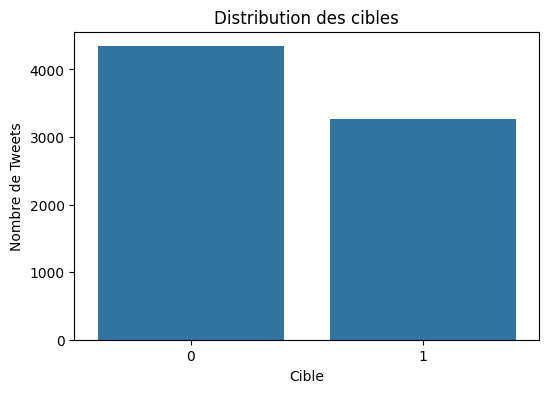

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution des cibles
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=train_df)
plt.title('Distribution des cibles')
plt.xlabel('Cible')
plt.ylabel('Nombre de Tweets')
plt.show()

In [20]:
# Statistiques descriptives pour chaque colonne
print("Statistiques descriptives pour train.csv:")
print(train_df.describe())

print("\nStatistiques descriptives pour test.csv:")
print(test_df.describe())

# Types de données de chaque colonne
print("\nTypes de données pour train.csv:")
print(train_df.dtypes)

print("\nTypes de données pour test.csv:")
print(test_df.dtypes)

Statistiques descriptives pour train.csv:
                 id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000

Statistiques descriptives pour test.csv:
                 id
count   3263.000000
mean    5427.152927
std     3146.427221
min        0.000000
25%     2683.000000
50%     5500.000000
75%     8176.000000
max    10875.000000

Types de données pour train.csv:
id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

Types de données pour test.csv:
id           int64
keyword     object
location    object
text        object
dtype: object


In [21]:
print(train_df.head())

print("\nDistribution des cibles dans le jeu d'entraînement:")
print(train_df['target'].value_counts(normalize=True))

print("\nValeurs manquantes dans le jeu d'entraînement:")
print(train_df.isnull().sum())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  

Distribution des cibles dans le jeu d'entraînement:
target
0    0.57034
1    0.42966
Name: proportion, dtype: float64

Valeurs manquantes dans le jeu d'entraînement:
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


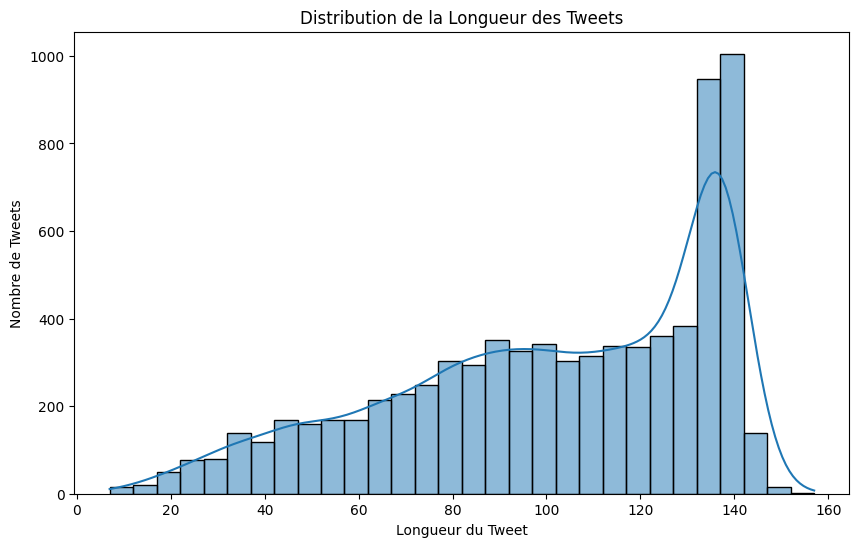

In [22]:
# Ajout d'une colonne pour la longueur des tweets
train_df['tweet_length'] = train_df['text'].apply(len)

# Histogramme de la longueur des tweets
plt.figure(figsize=(10,6))
sns.histplot(train_df['tweet_length'], bins=30, kde=True)
plt.title('Distribution de la Longueur des Tweets')
plt.xlabel('Longueur du Tweet')
plt.ylabel('Nombre de Tweets')
plt.show()

In [27]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    '''Fonction pour nettoyer le texte en supprimant les liens, les mentions, les caractères spéciaux et les stopwords'''
    text = re.sub(r'http\S+', '', text)  # Supprimer les liens
    text = re.sub(r'@\w+', '', text)  # Supprimer les mentions
    text = re.sub(r'\d+', '', text)  # Supprimer les nombres
    text = re.sub(r'#', '', text)  # Supprimer les hashtags (garder le texte)
    text = re.sub(r'\s+', ' ', text).strip()  # Supprimer les espaces supplémentaires
    text = ' '.join(word for word in text.split() if word.lower() not in STOPWORDS)  # Supprimer les stopwords
    return text

# Nettoyage du texte dans les jeux de données
train_df['text_clean'] = train_df['text'].apply(clean_text)
test_df['text_clean'] = test_df['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /home/daguek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


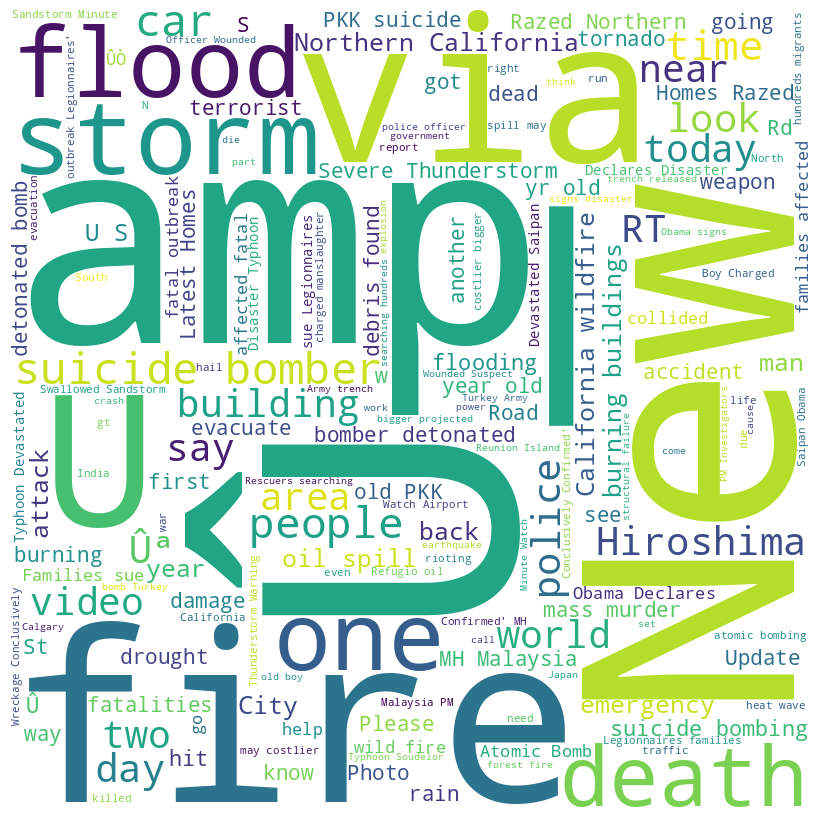

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Génération du texte pour les tweets relatifs aux désastres
disaster_tweets = ' '.join(train_df[train_df['target'] == 1]['text_clean'])

# Création du nuage de mots
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(disaster_tweets)

# Affichage du nuage de mots généré
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialisation du vectoriseur TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Limiter à 1000 mots pour simplifier le modèle

# Fit et transformation des données
X_train = vectorizer.fit_transform(train_df['text_clean']).toarray()
y_train = train_df['target'].values
X_test = vectorizer.transform(test_df['text_clean']).toarray()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Séparation des données en ensembles d'entraînement et de validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# Entraînement du modèle de régression logistique
model = LogisticRegression(max_iter=1000)
model.fit(X_train_split, y_train_split)

# Prédiction sur l'ensemble de validation
y_pred = model.predict(X_val_split)

# Évaluation du modèle
print("F1 Score:", f1_score(y_val_split, y_pred))

F1 Score: 0.7253289473684211


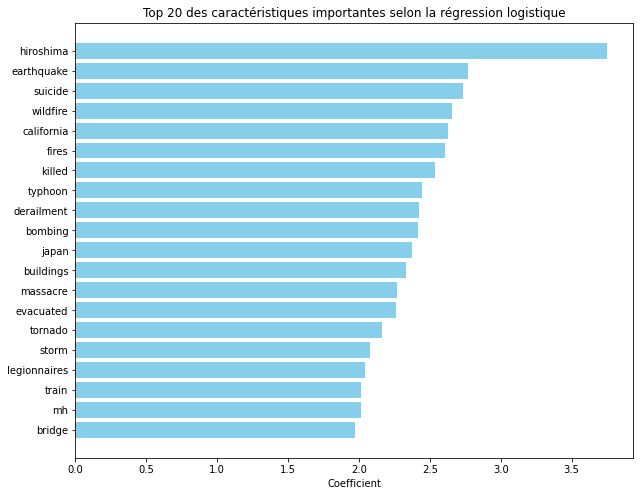

In [49]:
import numpy as np

# Obtenir les coefficients de la régression logistique
coefficients = model.coef_[0]
features = vectorizer.get_feature_names_out()

# Préparation des données
df_coeffs = pd.DataFrame({'features': features, 'coefficients': coefficients})
df_coeffs = df_coeffs.sort_values(by='coefficients', ascending=True).tail(20)  # Pour les 20 plus importants

# Création du graphique
plt.figure(figsize=(10, 8))
plt.barh(df_coeffs['features'], df_coeffs['coefficients'], color='skyblue')
plt.xlabel('Coefficient')
plt.title('Top 20 des caractéristiques importantes selon la régression logistique')
plt.show()

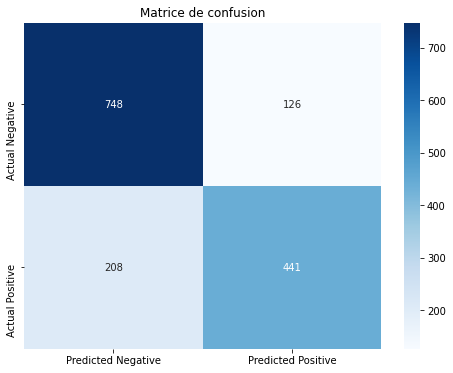

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_val_split, y_pred)

# Affichage de la matrice de confusion avec Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Matrice de confusion')
plt.show()

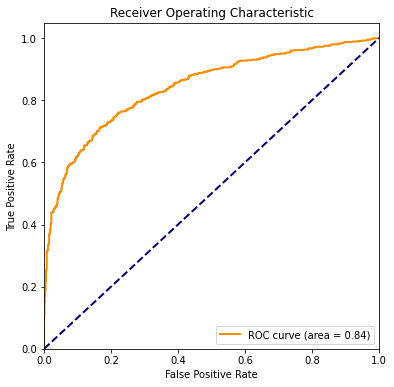

In [47]:
from sklearn.metrics import roc_curve, auc

# Calcul des taux de vrais positifs et faux positifs
fpr, tpr, thresholds = roc_curve(y_val_split, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [26]:
# Prédiction sur le jeu de données de test
test_predictions = model.predict(X_test)

# Préparation du fichier de soumission
submission = pd.DataFrame({'id': test_df['id'], 'target': test_predictions})
submission.to_csv('submission.csv', index=False)

## Conclusion 

Le projet de classification de tweets relatifs à des désastres naturels a démontré l'efficacité des techniques de NLP et des modèles de machine learning, en particulier la régression logistique, pour traiter et analyser des données textuelles complexes issues des réseaux sociaux. En suivant une démarche structurée, nous avons réussi à nettoyer et transformer les données textuelles en un format exploitable par notre modèle, puis à entraîner ce dernier pour qu'il puisse distinguer avec une certaine précision les tweets relatifs à des désastres réels de ceux qui ne le sont pas. Les visualisations générées avec Bokeh ont enrichi notre analyse en offrant des insights visuels sur la distribution des données, la performance du modèle et l'importance des caractéristiques. Bien que le modèle de régression logistique ait fourni une base solide, l'exploration de modèles supplémentaires comme la forêt aléatoire a ouvert la voie à une compréhension plus approfondie de l'importance des caractéristiques et à l'amélioration potentielle des performances. Ce projet souligne l'importance et le potentiel de l'application de l'intelligence artificielle pour améliorer la gestion des informations lors de crises, en filtrant efficacement les données pertinentes dans un flux d'informations en constante évolution. Les perspectives futures incluent l'expérimentation avec des architectures de modèles plus complexes, telles que les réseaux de neurones profonds, et l'exploration de techniques d'extraction de caractéristiques plus avancées pour continuer à améliorer la précision et la fiabilité de la classification des tweets en situation de désastre.